# Chapter 1

## The NBA Draft

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 2)

## Reading data

Let's read in the draft round picks from between 2000 and 2009

In [2]:
draft = pd.read_csv('../data/draft.csv', encoding='latin-1')
draft

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2009,NBA,1,1,LAC,Blake Griffin,20.106,F,us,...,8.8,4.4,0.9,0.5,0.498,0.521,0.333,0.694,75.2,0.167
1,2,2009,NBA,1,2,MEM,Hasheem Thabeet,22.135,C,tz,...,2.7,0.1,0.3,0.8,0.567,0.567,NaN,0.578,4.8,0.099
2,3,2009,NBA,1,3,OKC,James Harden,19.308,G,us,...,5.3,6.3,1.6,0.5,0.442,0.509,0.363,0.858,133.3,0.226
3,4,2009,NBA,1,4,SAC,Tyreke Evans,19.284,G-F,us,...,4.6,4.8,1.2,0.4,0.440,0.468,0.323,0.757,28.4,0.075
4,5,2009,NBA,1,5,MIN,Ricky Rubio,18.252,G,es,...,4.2,7.8,1.9,0.1,0.391,0.416,0.326,0.840,36.4,0.102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,289,2000,NBA,1,25,PHO,Jake Tsakalidis,21.024,C,ge,...,3.9,0.3,0.2,0.7,0.490,0.490,0.000,0.657,9.9,0.095
289,290,2000,NBA,1,26,DEN,Mamadou N'Diaye,25.019,C,sn,...,3.3,0.1,0.2,0.9,0.427,0.429,0.000,0.736,1.8,0.101
290,291,2000,NBA,1,27,IND,Primo_ Brezec,20.275,C,si,...,3.9,0.5,0.2,0.4,0.498,0.499,0.167,0.701,10.8,0.084
291,292,2000,NBA,1,28,POR,Erick Barkley,22.133,G,us,...,0.8,1.5,0.7,0.0,0.356,0.373,0.267,0.900,0.2,0.027


## Wrangling data

Firstly let's remove superfluous columns from the data

In [3]:
draft = draft.drop(draft.columns[[2, 3]], axis=1)
# note, we've reduced the values by 2 when compared with the book because we've done this in two stages.
draft = draft.drop(draft.columns[13:22], axis=1) 

Now let's remove unwanted rows - these are mostly blank

In [4]:
draft = draft.drop([90, 131])

### Viewing data

Let's get an impression of the data, first and last three rows:

In [5]:
draft[1:4]

,Rk,Year,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MP,WS,WS/48
1,2,2009,2,MEM,Hasheem Thabeet,22.135,C,tz,UConn,2010.0,2014.0,224.0,10.5,4.8,0.099
2,3,2009,3,OKC,James Harden,19.308,G,us,Arizona State,2010.0,2020.0,826.0,34.3,133.3,0.226
3,4,2009,4,SAC,Tyreke Evans,19.284,G-F,us,Memphis,2010.0,2019.0,594.0,30.7,28.4,0.075


In [6]:
draft[-3:]

,Rk,Year,Pk,Tm,Player,Age,Pos,Born,College,From,To,G,MP,WS,WS/48
290,291,2000,27,IND,Primo_ Brezec,20.275,C,si,NaN,2002.0,2010.0,342.0,18.1,10.8,0.084
291,292,2000,28,POR,Erick Barkley,22.133,G,us,St. John's,2001.0,2002.0,27.0,9.9,0.2,0.027
292,293,2000,29,LAL,Mark Madsen,24.158,F,us,Stanford,2001.0,2009.0,453.0,11.8,8.2,0.074


### Converting data to categories

If you plan to model or visualize data, converting variables to factors that are truely categorical is almost mandatory.

pandas has a datatype called "categorical", which is the equivalent of R's factor type.

In [7]:
draft['Year'] = draft['Year'].astype('category')
draft['Tm'] = draft['Tm'].astype('category')
draft['Born'] = draft['Born'].astype('category')
draft['From'] = draft['From'].astype('category')
draft['To'] = draft['To'].astype('category')

### Creating dervied variables

A field named Born2 should show whether a player was born in or outside the US.

In [8]:
draft['Born2'] = draft['Born'].apply(lambda place: 'USA' if place == 'us' else 'World').astype('category')

We want a second field to determine whether the player can from college or not.

In [9]:
draft['College2'] = draft['College'].isna().map({True: 0, False: 1}).astype('category')

Finally we want to clean up the player's position, replacing

* C by Center
* C-F and F-C by Big
* F by Forward
* G by Guard
* F-G and G-F by Swingman

In [10]:
draft['Pos2'] = draft['Pos'].map({
    'C': 'Center',
    'C-F': 'Big',
    'F': 'Forward',
    'F-C': 'Big',
    'F-G': 'Swingman',
    'G': 'Guard',
    'G-F': 'Swingman'
}).astype('category')

## Exploratory data analysis

EDA is most often a mix of computing basic statistics and creating visual content. We will concentrate here on a single variable *win shares*.

Let's start with the describe function. The describe() method in pandas provides a summary of statistical information about a DataFrame or Series. When applied to a DataFrame, it gives you a quick overview of the central tendency, dispersion, and shape of the distribution of your data.

In [11]:
draft.describe()

,Rk,Pk,Age,G,MP,WS,WS/48
count,291.000000,291.000000,291.000000,289.000000,289.000000,289.000000,289.000000
mean,147.243986,15.219931,20.718677,528.048443,21.559170,29.486159,0.076332
std,84.949147,8.471845,1.408725,319.388779,7.780285,33.709831,0.061509
min,1.000000,1.000000,17.249000,6.000000,4.300000,-1.600000,-0.326000
25%,73.500000,8.000000,19.327000,249.000000,15.700000,4.100000,0.051000
50%,148.000000,15.000000,21.016000,549.000000,21.600000,19.700000,0.079000
75%,220.500000,22.500000,22.052500,790.000000,27.700000,43.900000,0.106000
max,293.000000,30.000000,25.019000,1326.000000,38.400000,236.100000,0.244000


Note, in this case, the median is named (correctly) as the 50th percentile.

If we want to find the players matching the min or max of specific properties we can select them as follows,

Minimum win share:

In [12]:
row = draft[draft['WS'] == draft['WS'].min()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
118,Mardy Collins,NYK,29,2006


Maximum win share:

In [13]:
row = draft[draft['WS'] == draft['WS'].max()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
179,LeBron James,CLE,1,2003


Minimum goals:

In [14]:
row = draft[draft['G'] == draft['G'].min()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
170,Pavel Podkolzin,UTA,21,2004


Maximum goals:

In [15]:
row = draft[draft['G'] == draft['G'].max()][:1]
row[['Player', 'Tm', 'Pk', 'Year']]

,Player,Tm,Pk,Year
271,Jamal Crawford,CLE,8,2000


## Computing and visualizing frequency distributions

### Histograms

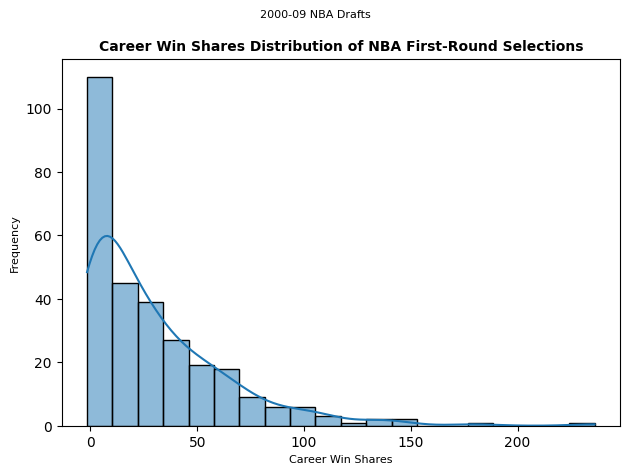

In [16]:
sns.histplot(draft['WS'], kde=True)
plt.title('Career Win Shares Distribution of NBA First-Round Selections', fontsize=10, fontweight='bold')
plt.suptitle('2000-09 NBA Drafts', fontsize=8)
plt.xlabel('Career Win Shares', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.tight_layout()

In [17]:
print(len(draft[draft['WS'] >= 75]), "win shares greater then 75")
print(len(draft[draft['WS'] < 75]), "win shares less then 75")
print(len(draft[draft['WS'] <= 25]), "win shares less then 25")

27 win shares greater then 75
262 win shares less then 75
167 win shares less then 25


### Boxplots

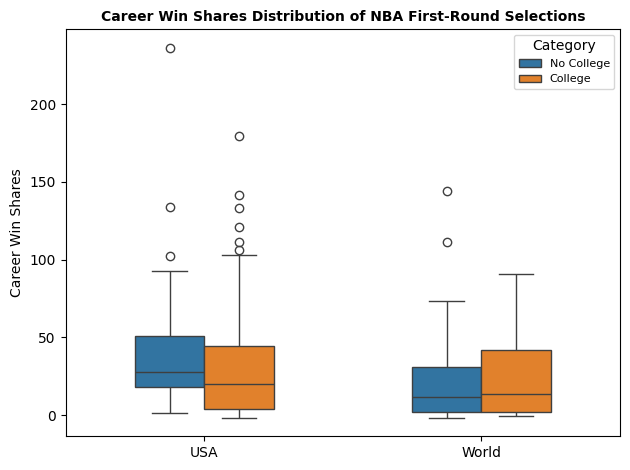

In [18]:
box_draft = draft.copy()
box_draft['College2'] = box_draft['College2'].map({0: 'No College', 1: 'College'})
ax = sns.boxplot(x='Born2', y='WS', hue='College2', data=box_draft, width=0.5, dodge=True)
plt.title('Career Win Shares Distribution of NBA First-Round Selections', fontsize=10, fontweight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('Career Win Shares', fontsize=10)
plt.legend(title='Category', title_fontsize=10, fontsize=8)
plt.tight_layout()

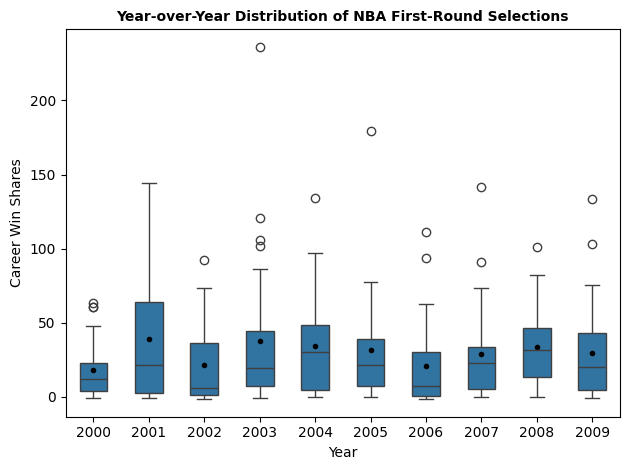

In [19]:
ax = sns.boxplot(x='Year', y='WS', data=draft, width=0.5, dodge=True)
plt.title('Year-over-Year Distribution of NBA First-Round Selections', fontsize=10, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Career Win Shares', fontsize=10)
# provides mean over boxplot
sns.pointplot(x='Year', y='WS', data=draft, estimator=np.mean, color='black', markers='o', markersize=2, linestyle='none', errorbar=None)
plt.tight_layout()

### Tables

In R you have the %>% pipe operator to chain transformations over a data frame. In pandas we can just use method chaining to achieve the same outcome.

Similarly, rather than dplyr's summarize, we can use the agg function.

In [20]:
draft.agg(
    MIN=('WS', 'min'), 
    LQ = ('WS', lambda x: x.quantile(.25)),
    UQ = ('WS', lambda x: x.quantile(.75)),
    AVG = ('WS', 'mean'),
    M = ('WS', 'median'),
    MAX = ('WS', 'max'),
).transpose()

,MIN,LQ,UQ,AVG,M,MAX
WS,-1.6,4.1,43.9,29.486159,19.7,236.1


We can summarize over a grouped function, for example mean win share by year:

In [21]:
draft.groupby('Year').agg(avg=('WS', 'mean'))

,avg
Year,
2000,18.268966
2001,39.035714
2002,21.414286
2003,37.913793
2004,33.972414
2005,31.667857
2006,20.637931
2007,28.558621
2008,33.723333


We can take a tally to count the number of players who accrued 75 or more win shares in their respective careers.

In [22]:
draft[draft['WS'] >= 75].groupby('Year').agg(count=('Year', 'count'))

,count
Year,
2000,0
2001,7
2002,1
2003,5
2004,2
2005,3
2006,2
2007,2
2008,2


Now let's find out who the 7 players from 2001 are:

In [23]:
draft[(draft['WS'] >= 75) & (draft['Year'] == 2001)][['Player', 'Pk', 'WS']]

,Player,Pk,WS
237,Tyson Chandler,2,102.1
238,Pau Gasol,3,144.1
241,Shane Battier,6,75.7
245,Joe Johnson,10,82.8
248,Richard Jefferson,13,83.0
254,Zach Randolph,19,81.1
263,Tony Parker,28,111.3


Similarly, let's do the same for the players from 2003, but reorder the rows by WS descending order.

In [24]:
draft[(draft['WS'] >= 75) & (draft['Year'] == 2003)][['Player', 'Pk', 'WS']].sort_values('WS', ascending=False)

,Player,Pk,WS
179,LeBron James,1,236.1
183,Dwyane Wade,5,120.7
182,Chris Bosh,4,106.0
181,Carmelo Anthony,3,102.0
196,David West,18,85.9


Let's find the mean and median Pk grouped by Year for players with WS over 75.

In [25]:
draft[(draft['WS'] >= 75)].groupby('Year').agg(avg=('Pk', 'mean'), median=('Pk', 'median'))

,avg,median
Year,,
2000,NaN,NaN
2001,11.571429,10.0
2002,9.000000,9.0
2003,6.200000,4.0
2004,5.000000,5.0
2005,12.333333,4.0
2006,13.000000,13.0
2007,2.500000,2.5
2008,4.500000,4.5


In [26]:
draft[(draft['WS'] >= 100)].groupby('Year').agg(avg=('Pk', 'mean'), median=('Pk', 'median'))

,avg,median
Year,,
2000,NaN,NaN
2001,11.00,3.0
2002,NaN,NaN
2003,3.25,3.5
2004,1.00,1.0
2005,4.00,4.0
2006,2.00,2.0
2007,2.00,2.0
2008,4.00,4.0


Let's pivot and look for the same stats for those players with a win share less than 25.

In [27]:
draft[(draft['WS'] <= 25)].groupby('Year').agg(avg=('Pk', 'mean'), median=('Pk', 'median'))

,avg,median
Year,,
2000,15.772727,14.5
2001,14.866667,16.0
2002,16.578947,17.0
2003,15.647059,16.0
2004,18.636364,21.0
2005,18.187500,18.5
2006,17.380952,18.0
2007,16.187500,16.5
2008,16.615385,14.0


Or for those with less than 5 win share.

In [28]:
draft[(draft['WS'] <= 5)].groupby('Year').agg(avg=('Pk', 'mean'), median=('Pk', 'median'))

,avg,median
Year,,
2000,17.444444,15.0
2001,17.875000,19.0
2002,15.272727,18.0
2003,19.200000,17.0
2004,17.111111,16.0
2005,18.200000,15.0
2006,18.500000,18.5
2007,17.625000,18.0
2008,23.750000,28.5


In [29]:
draft[(draft['WS'] <= 5)].groupby('Year').agg(count=('Pk', 'count'))

,count
Year,
2000,9
2001,8
2002,11
2003,5
2004,9
2005,5
2006,12
2007,8
2008,4


In [30]:
draft[(draft['WS'] <= 0)].groupby('Year').agg(count=('Pk', 'count'))

,count
Year,
2000,2
2001,3
2002,4
2003,2
2004,3
2005,1
2006,5
2007,1
2008,0


There appears to be a relationship between win shares and where in the first round players were selected. Players who accrued a relatively high number of win shares were generally drafted before other players who earned a lesser number of win shares.

## Computing and visualizing correlations

First limit the data frame to just those columns with continuous variables, and find the correlation between each variable.

In [31]:
cor_draft = draft[['Age', 'G', 'MP', 'WS', 'WS/48']]

In [32]:
cor_matrix = cor_draft.corr()
cor_matrix

,Age,G,MP,WS,WS/48
Age,1.000000,-0.231301,-0.249422,-0.259032,-0.193183
G,-0.231301,1.000000,0.791197,0.800381,0.613389
MP,-0.249422,0.791197,1.000000,0.778824,0.658039
WS,-0.259032,0.800381,0.778824,1.000000,0.693268
WS/48,-0.193183,0.613389,0.658039,0.693268,1.000000


In [33]:
melt = pd.melt(cor_matrix, ignore_index=False)
melt.head(n=3)

,variable,value
Age,Age,1.000000
G,Age,-0.231301
MP,Age,-0.249422


In [34]:
melt.tail(n=3)

,variable,value
MP,WS/48,0.658039
WS,WS/48,0.693268
WS/48,WS/48,1.000000


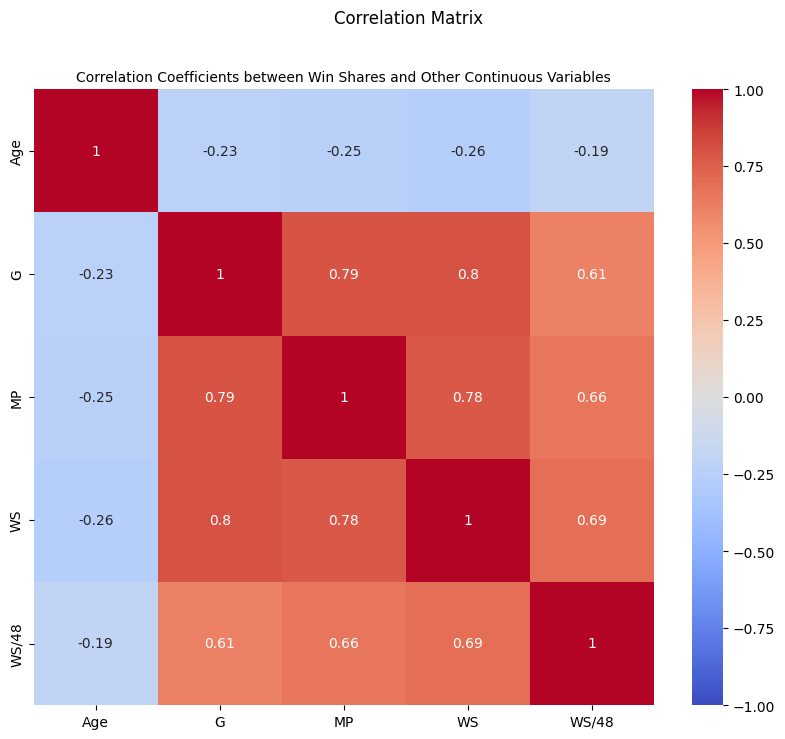

In [35]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Coefficients between Win Shares and Other Continuous Variables', fontsize=10)
fig.suptitle('Correlation Matrix')
plt.show()

There are positive correlations between:

* win shares and regular season games
* minutes played and win shares for every 48 mins of game time

There is also a negative correlation between win shares and age drafted. Meaning the earlier in their career they began playing professionally the better.

### Computing and visualizing means and medians

In [36]:
ws_by_birthplace = draft.groupby('Born2', observed=False).agg(meanWS=('WS', 'mean'), medianWS=('WS', 'median'))
ws_by_birthplace

,meanWS,medianWS
Born2,,
USA,31.099107,21.5
World,23.927692,12.8


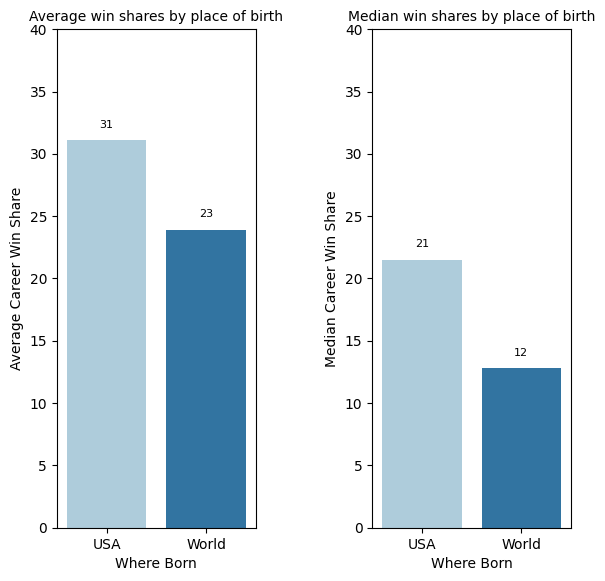

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))

sns.barplot(x='Born2', y='meanWS', data=ws_by_birthplace, ax=ax1, palette = "Paired", hue = 'Born2')
ax1.set_title('Average win shares by place of birth', fontsize=10)
ax1.set_xlabel('Where Born')
ax1.set_ylabel('Average Career Win Share')
ax1.set_ylim(0, 40)
for i, v in enumerate(ws_by_birthplace['meanWS']):
   ax1.text(i, v + 1, str(int(v)), ha='center', fontsize=8)


sns.barplot(x='Born2', y='medianWS', data=ws_by_birthplace, ax=ax2, palette = "Paired", hue = 'Born2')
ax2.set_title('Median win shares by place of birth', fontsize=10)
ax2.set_xlabel('Where Born')
ax2.set_ylabel('Median Career Win Share')
ax2.set_ylim(0, 40)
for i, v in enumerate(ws_by_birthplace['medianWS']):
   ax2.text(i, v + 1, str(int(v)), ha='center', fontsize=8)

plt.tight_layout(pad=5.0)
plt.show()

* Players born in the USA, on average, accrued more career win shares than players born elsewhere.
* However, the median shows the mean is skewed somewhat by "superstar" players.

Let's do the same exercise for colleges.

In [38]:
college_draft = draft.copy()
college_draft['College2'] = college_draft['College2'].map({0: 'No College', 1: 'College'})
ws_by_college = college_draft.groupby('College2', observed=False).agg(meanWS=('WS', 'mean'), medianWS=('WS', 'median'))
ws_by_college

,meanWS,medianWS
College2,,
No College,30.904225,19.70
College,29.024312,19.65


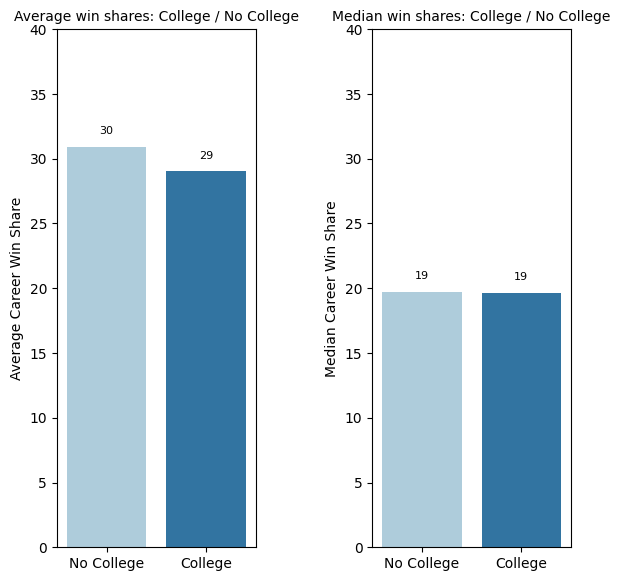

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 7))

sns.barplot(x='College2', y='meanWS', data=ws_by_college, ax=ax1, palette = "Paired", hue = 'College2')
ax1.set_title('Average win shares: College / No College', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Average Career Win Share')
ax1.set_ylim(0, 40)
for i, v in enumerate(ws_by_college['meanWS']):
   ax1.text(i, v + 1, str(int(v)), ha='center', fontsize=8)

sns.barplot(x='College2', y='medianWS', data=ws_by_college, ax=ax2, palette = "Paired", hue = 'College2')
ax2.set_title('Median win shares: College / No College', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Median Career Win Share')
ax2.set_ylim(0, 40)
for i, v in enumerate(ws_by_college['medianWS']):
   ax2.text(i, v + 1, str(int(v)), ha='center', fontsize=8)

plt.tight_layout(pad=5.0)
plt.show()

## Summary over multiple combinations

In [55]:
college_draft = draft.copy()
college_draft['College2'] = college_draft['College2'].map({0: 'No College', 1: 'College'})
combos = college_draft.groupby(['Pos2', 'Born2', 'College2']).agg(avg=('WS', 'mean'), median=('WS', 'median'))
combos

avg  median
Pos2     Born2 College2                 
Big      USA   No College  81.75   81.75
               College     36.45   24.80
         World No College  42.24   25.30
               College     46.40   46.40
Center   USA   No College  54.12   32.65
               College     22.41   20.10
         World No College  16.60   10.80
               College     22.63   16.25
Forward  USA   No College  24.45   18.65
               College     25.22   13.10
         World No College  13.73    2.00
               College     19.08    5.80
Guard    USA   No College  19.22   21.00
               College     29.82   18.40
         World No College  23.97   15.10
               College     33.30   33.30
Swingman USA   No College  70.30   25.90
               College     39.62   30.40
         World No College  30.18   30.20
               College     18.20   18.20

Text(0.5, 0.98, 'Median Win Shares by Place of Birth')

<Figure size 2000x1000 with 0 Axes>

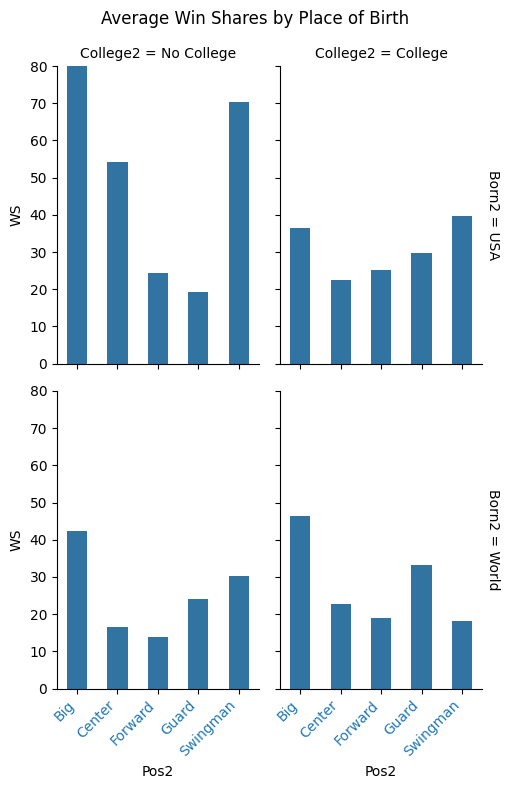

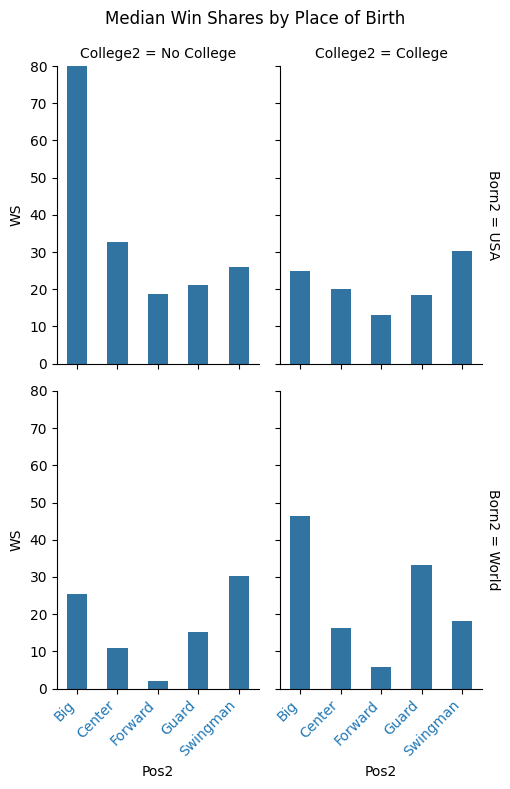

In [167]:
# sns.displot(data=combos, x="Pos2", y='avg', col="College2", row='Born2',  kind="ecdf")
fig = plt.figure(figsize=(20, 10))

g1 = sns.FacetGrid(college_draft, col="College2", row="Born2", height=4, aspect=.65, margin_titles=True)
g1.set(ylim=(0, 80))
g1.map(sns.barplot, "Pos2", "WS", width=0.5, estimator='mean', ci=None)
g1.map(plt.xticks, rotation=45, ha='right')
g1.fig.subplots_adjust(top=0.91)
g1.fig.suptitle('Average Win Shares by Place of Birth')

g2 = sns.FacetGrid(college_draft, col="College2", row="Born2", height=4, aspect=.65, margin_titles=True)
g2.set(ylim=(0, 80))
g2.map(sns.barplot, "Pos2", "WS", width=0.5, estimator='median', ci=None)
g2.map(plt.xticks, rotation=45, ha='right')
g2.fig.subplots_adjust(top=0.91)
g2.fig.suptitle('Median Win Shares by Place of Birth')


## Writing data

In [169]:
draft.to_csv('draft2.csv')